In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
%matplotlib inline

In [2]:
meta = pd.read_csv("..//data//potatometadata_forClaudia.csv")
meta.head()

,FieldID,Experiment,field name,diffCSscore,Mean.Control.Microbe,Mean.LowN.Microbe,varCtub,varNtub,varCSscore,invVar_Ctub,...,cladediv0.55,claderich0.6,cladediv0.6,claderich0.7,cladediv0.7,claderich0.8,cladediv0.8,asvrich,asvdiv,PD
0,1,2015,CF1,1.280556,247.26153,218.67840,75.443121,551.385549,1.148148,0.013255,...,4.835654,339,4.887446,370,5.087528,395,5.226187,400,5.230529,31.699375
1,2,2015,CF2,0.762103,221.60938,216.76044,2061.830163,329.386189,0.833558,0.000485,...,4.842094,321,4.898134,337,5.144046,354,5.209358,355,5.211097,26.603089
2,3,2015,CF4,1.089286,260.05795,209.17201,382.961433,853.913357,0.317602,0.002611,...,4.153512,286,4.232498,310,4.453618,340,4.567909,340,4.567909,30.883599
3,4,2015,CF5,3.208333,238.36716,233.20952,452.336408,214.991855,9.159722,0.002211,...,4.511198,249,4.570936,264,4.752686,274,4.784318,274,4.784318,23.384369
4,5,2015,DO1,2.450000,286.36653,252.37100,941.434313,249.128362,4.196667,0.001062,...,4.403219,142,4.414700,154,4.602408,159,4.638410,159,4.638410,19.468832


In [3]:
taxa = pd.read_csv("..//data//potatorar_forsubmission.csv")
taxa.columns.values[0] = "FieldID"
taxa = taxa.rename(columns = {'FieldID':'FieldID'})
taxa.head()

,FieldID,X.f60d1b84853b19fa59e9f6d208e16d96,X.143dd5eba65cad20a08627268e42e7da,X.1d83379743c4c48f1b55deb99f006f2f,X.2b85f692bc205a2ba3826c924566b8d4,X.48a689917bdd4a6d9d3e8a438d88409a,X.60b27b22f60b9ed3c759b818c3e139a5,X.6973d3d7e593cc1b245f3d284f8ac63d,X.6a25639bf80c2a4d67fb5afdb7936527,X.7375b22789de1fc3f7165b84a2f78199,...,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.fda7381785bd70780f57b54975ec27ad,X.4092452cccf123b62ba6e23278b18e82,X.b31710a66252a477148f8e3bdfb1505b,X.bafb89b007d809438da956e6ed14f635,X.9ea9bd20eea275e169864132dda04303
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,0,0


In [4]:
# covert field id to index, make it convenient to calculate euclidean distance
taxa_2 = taxa.set_index('FieldID')

# Grouping Different Fields

In [5]:
taxa_arr = np.array(taxa_2)
# check if the conversion is correct
# the test is Field ID = 8, attribute = 'X.7d14d3768b5e662b5d149e118eb1d769'
assert taxa_arr[7][9] == 25
# the test is Field ID = 12, attribute = 'X.f60d1b84853b19fa59e9f6d208e16d96'
assert taxa_arr[11][0] == 67

In [6]:
from scipy.spatial import distance
distance = distance.cdist(taxa_arr, taxa_arr, 'euclidean')
distance[:1]

array([[   0.        ,  392.31110104, 1105.59757597,  487.69457655,
         662.46660293,  651.83433478,  724.94275636,  630.92630314,
         624.57985879,  775.0858017 ,  717.93593029,  708.79616252,
         586.99744463,  558.76649864,  576.39396249,  537.04003575,
         622.12699668,  529.13892316,  506.99704141,  589.55406877,
         534.70365624,  579.84480682,  537.84570278,  520.1538234 ,
         560.37487453,  510.65448201]])

In [7]:
distance_df = pd.DataFrame(distance)
distance_df = distance_df.set_index(taxa.FieldID)
distance_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,392.311101,1105.597576,487.694577,662.466603,651.834335,724.942756,630.926303,624.579859,775.085802,...,622.126997,529.138923,506.997041,589.554069,534.703656,579.844807,537.845703,520.153823,560.374875,510.654482
2,392.311101,0.000000,1069.629843,441.893652,672.881862,658.448176,719.623513,622.090026,629.363170,770.340185,...,607.033772,513.219251,497.901597,571.592512,517.466907,565.351218,520.688006,512.423653,539.762911,498.461633


Text(75.52000000000001, 0.5, 'Field ID')

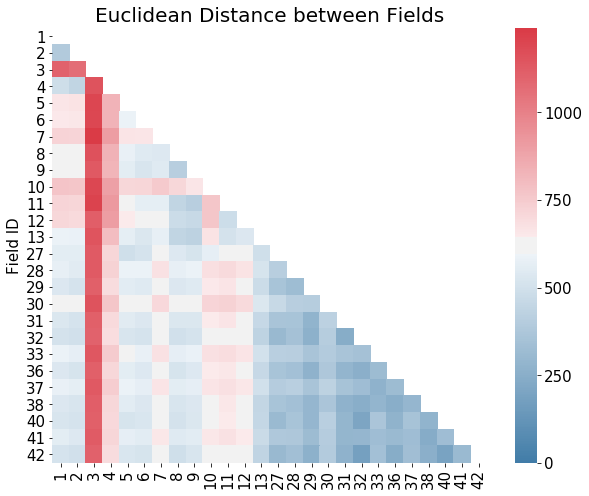

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
mask = np.zeros_like(distance_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(distance_df, mask=mask, cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)
ax.set_title("Euclidean Distance between Fields", fontsize=20)
ax.set_xticklabels(list(taxa.FieldID))
ax.set_ylabel("Field ID", fontsize=15)

Field 3 is very different from any other fields. So, the prediction for Field 3 can vary vastly from the actual data. 

Similar Group:  
a. Field 1, 2, 4  
b. Field 8, 9, 11, 13  
c. Field 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 40, 41, 42 (all fields in the confirmatory experiement)  

# Preprocessing

In [9]:
import Utils

## update the Utils library
import importlib
importlib.reload(Utils)

<module 'Utils' from 'C:\\Users\\CSY\\Desktop\\potato-lankau\\scripts\\Utils.py'>

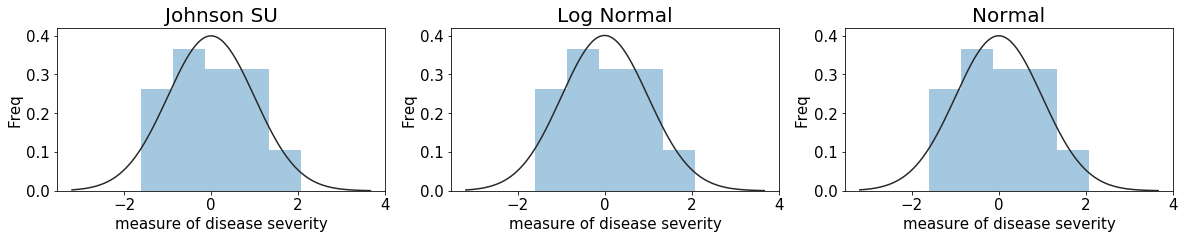

In [10]:
yt_disease, gamma, eta, epsilon, lbda = Utils.johnson_transform(meta.diffCSscore)
Utils.check_dist(yt_disease, xlab="measure of disease severity")

In [11]:
from sklearn.model_selection import train_test_split

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [14]:
## hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth': [7,10,13,15,17,21],
    'max_features': [5,7,10,15,20,30],
    'min_samples_split': [2,5,7,10],
    'n_estimators': [20,50,100]
}

In [15]:
## visualize one of the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

## Using only meta data

In [16]:
# drop non-numeric column
meta_clean = meta.drop(['field name', 'diffCSscore'], axis=1)
# In the new field, experiment conducted in 2015 is labeled as 0 whereas in 2017 as 1
meta_clean['Experiment'] = meta_clean['Experiment'].replace(2015, 0)
meta_clean['Experiment'] = meta_clean['Experiment'].replace(2017, 1)
# drop all column related to yield
yld_list = ['Mean.Control.Microbe', 'Mean.LowN.Microbe', 'varCtub', 'varNtub', 'invVar_Ctub',
           'invVar_Ntub', 'Std.Err.Mean.Control.Microbe', 'Std.Err.Mean.LowN.Microbe', ]
disease_unwanted = ['varCSscore', 'invVar_Csscore', 'seCSscore']
meta_clean = meta_clean.drop(yld_list, axis=1)
meta_clean = meta_clean.drop(disease_unwanted, axis=1)
meta_clean_2 = meta_clean.set_index('FieldID')
meta_clean_2.head(1)

,Experiment,claderich0.1,cladediv0.1,claderich0.15,cladediv0.15,claderich0.2,cladediv0.2,claderich0.25,cladediv0.25,claderich0.3,...,cladediv0.55,claderich0.6,cladediv0.6,claderich0.7,cladediv0.7,claderich0.8,cladediv0.8,asvrich,asvdiv,PD
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,22,2.276874,40,2.601291,69,2.899249,118,3.239466,167,...,4.835654,339,4.887446,370,5.087528,395,5.226187,400,5.230529,31.699375


In [18]:
meta_clean_2_unnormalized = meta_clean_2
meta_clean_2, mu_meta, sd_meta = Utils.normalization(meta_clean_2)
xtrain_meta_d, xval_meta_d, ytrain_meta_d, yval_meta_d = train_test_split(meta_clean_2, yt_disease, test_size = 0.2, random_state = 1)

In [19]:
ytrain_d_orig = Utils.johnson_inverse(ytrain_meta_d, gamma, eta, epsilon, lbda)
yval_d_orig = Utils.johnson_inverse(yval_meta_d, gamma, eta, epsilon, lbda)

In [20]:
rf1 = RandomForestRegressor(random_state=2)
rf1.fit(xtrain_meta_d, ytrain_meta_d)

# training set
rf_train_pred1 = pd.Series(rf1.predict(xtrain_meta_d))
rf_train_pred_orig1 = Utils.johnson_inverse(rf_train_pred1, gamma, eta, epsilon, lbda)

# validation set
rf_val_pred1 = pd.Series(rf1.predict(xval_meta_d))
rf_val_pred_orig1 = Utils.johnson_inverse(rf_val_pred1, gamma, eta, epsilon, lbda)

C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
mse_rf_train1 = mean_squared_error(rf_train_pred_orig1, ytrain_d_orig)
mse_rf_val1 = mean_squared_error(rf_val_pred_orig1, yval_d_orig)
np.sqrt(mse_rf_train1), np.sqrt(mse_rf_val1)

(0.4695655448506, 1.335076136887193)

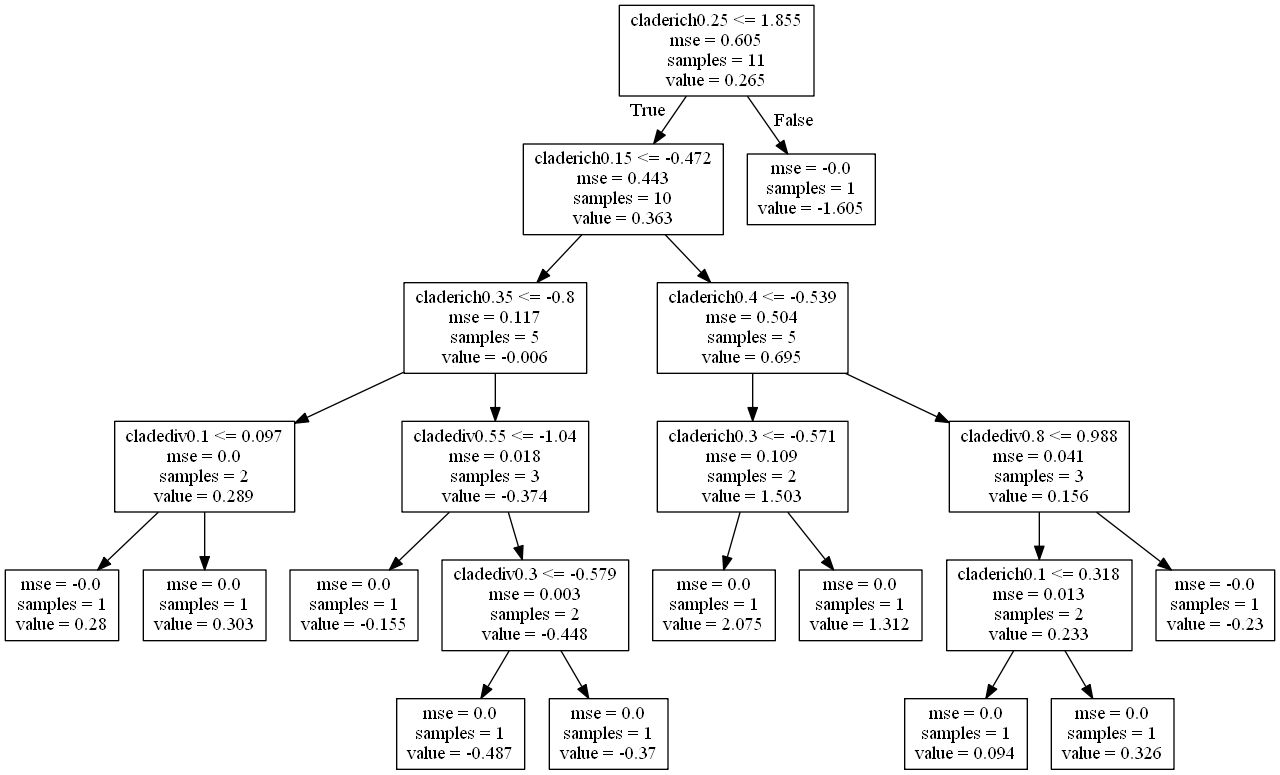

In [22]:
## visualize one of the tree
dot_data = StringIO()
estimator = rf1.estimators_[0]
export_graphviz(estimator, out_file=dot_data, feature_names=xtrain_meta_d.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### tuning

In [23]:
rf_random_meta_d = RandomizedSearchCV(estimator=rf1, param_distributions=param_grid, n_iter=100, cv=5, random_state=2)
rf_random_meta_d.fit(xtrain_meta_d, ytrain_meta_d)
rf_random_meta_d.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=None, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [24]:
# training set
rfrd_train_pred1 = pd.Series(rf_random_meta_d.predict(xtrain_meta_d))
rfrd_train_pred_orig1 = Utils.johnson_inverse(rfrd_train_pred1, gamma, eta, epsilon, lbda)

# validation set
rfrd_val_pred1 = pd.Series(rf_random_meta_d.predict(xval_meta_d))
rfrd_val_pred_orig1 = Utils.johnson_inverse(rfrd_val_pred1, gamma, eta, epsilon, lbda)

mse_rfrd_train1 = mean_squared_error(rfrd_train_pred_orig1, ytrain_d_orig)
mse_rfrd_val1 = mean_squared_error(rfrd_val_pred_orig1, yval_d_orig)
np.sqrt(mse_rfrd_train1), np.sqrt(mse_rfrd_val1)

(1.0002441073426172, 1.455131702974996)

## Using only taxa data

In [25]:
taxa_clean = taxa.loc[:, (taxa != 0).any(axis=0)]  # drop columns contain only 0
print(taxa_clean.shape)

taxa_clean_2 = taxa_clean.set_index('FieldID')
taxa_clean_2.head(2)

(26, 9892)


,X.f60d1b84853b19fa59e9f6d208e16d96,X.143dd5eba65cad20a08627268e42e7da,X.1d83379743c4c48f1b55deb99f006f2f,X.2b85f692bc205a2ba3826c924566b8d4,X.60b27b22f60b9ed3c759b818c3e139a5,X.6973d3d7e593cc1b245f3d284f8ac63d,X.6a25639bf80c2a4d67fb5afdb7936527,X.7d14d3768b5e662b5d149e118eb1d769,X.9c2f2389f76ceacd02fae2f0bfbd0afb,X.9fa7366dd5f14f5a131b874549c44696,...,X.b21ace384dce2bee9979419021f280b7,X.b8e03ac481f6e7ad4c5bcae9d44ef0ee,X.bdd19e20552367f7068aae7443c1a878,X.dbeb232ebe90883462f226d519318954,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.4092452cccf123b62ba6e23278b18e82
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_taxa, mu_taxa, sd_taxa = Utils.normalization(taxa_clean_2)
X_taxa = pd.concat([meta_clean['Experiment'], X_taxa.reset_index()], axis=1)
X_taxa = X_taxa.set_index('FieldID')
print(X_taxa.shape)
X_taxa.head()

(26, 9892)


,Experiment,X.f60d1b84853b19fa59e9f6d208e16d96,X.143dd5eba65cad20a08627268e42e7da,X.1d83379743c4c48f1b55deb99f006f2f,X.2b85f692bc205a2ba3826c924566b8d4,X.60b27b22f60b9ed3c759b818c3e139a5,X.6973d3d7e593cc1b245f3d284f8ac63d,X.6a25639bf80c2a4d67fb5afdb7936527,X.7d14d3768b5e662b5d149e118eb1d769,X.9c2f2389f76ceacd02fae2f0bfbd0afb,...,X.b21ace384dce2bee9979419021f280b7,X.b8e03ac481f6e7ad4c5bcae9d44ef0ee,X.bdd19e20552367f7068aae7443c1a878,X.dbeb232ebe90883462f226d519318954,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.4092452cccf123b62ba6e23278b18e82
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
2,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
3,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
4,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
5,0,-0.202122,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,...,-0.196116,-0.196116,-0.196116,-0.196116,4.902903,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116


In [27]:
xtrain_taxa_d, xval_taxa_d, ytrain_taxa_d, yval_taxa_d = train_test_split(X_taxa, yt_disease, test_size = 0.2, random_state = 1)

rf2 = RandomForestRegressor(random_state=2)
rf2.fit(xtrain_taxa_d, ytrain_taxa_d)

# training set
rf_train_pred2 = pd.Series(rf2.predict(xtrain_taxa_d))
rf_train_pred_orig2 = Utils.johnson_inverse(rf_train_pred2, gamma, eta, epsilon, lbda)

# validation set
rf_val_pred2 = pd.Series(rf2.predict(xval_taxa_d))
rf_val_pred_orig2 = Utils.johnson_inverse(rf_val_pred2, gamma, eta, epsilon, lbda)

C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
mse_rf_train2 = mean_squared_error(rf_train_pred_orig2, ytrain_d_orig)
mse_rf_val2 = mean_squared_error(rf_val_pred_orig2, yval_d_orig)
np.sqrt(mse_rf_train2), np.sqrt(mse_rf_val2)

(0.451526584676599, 1.4290454529312377)

### tuning

In [29]:
rf_random_taxa_d2 = RandomizedSearchCV(estimator=rf2, param_distributions = param_grid, n_iter=100, cv=5, n_jobs=-1, random_state=2)
rf_random_taxa_d2.fit(xtrain_taxa_d, ytrain_taxa_d)
rf_random_taxa_d2.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=None, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [30]:
# training set
rfrd_train_pred2 = pd.Series(rf_random_taxa_d2.predict(xtrain_taxa_d))
rfrd_train_pred_orig2 = Utils.johnson_inverse(rfrd_train_pred2, gamma, eta, epsilon, lbda)

# validation set
rfrd_val_pred2 = pd.Series(rf_random_taxa_d2.predict(xval_taxa_d))
rfrd_val_pred_orig2 = Utils.johnson_inverse(rfrd_val_pred2, gamma, eta, epsilon, lbda)

mse_rfrd_train2 = mean_squared_error(rfrd_train_pred_orig2, ytrain_d_orig)
mse_rfrd_val2 = mean_squared_error(rfrd_val_pred_orig2, yval_d_orig)
np.sqrt(mse_rfrd_train2), np.sqrt(mse_rfrd_val2)

(0.4685473492933916, 1.4409324784362212)

Altough using taxa has much lower MSE for training set, it has roughly the same MSE for validation set as using meta data

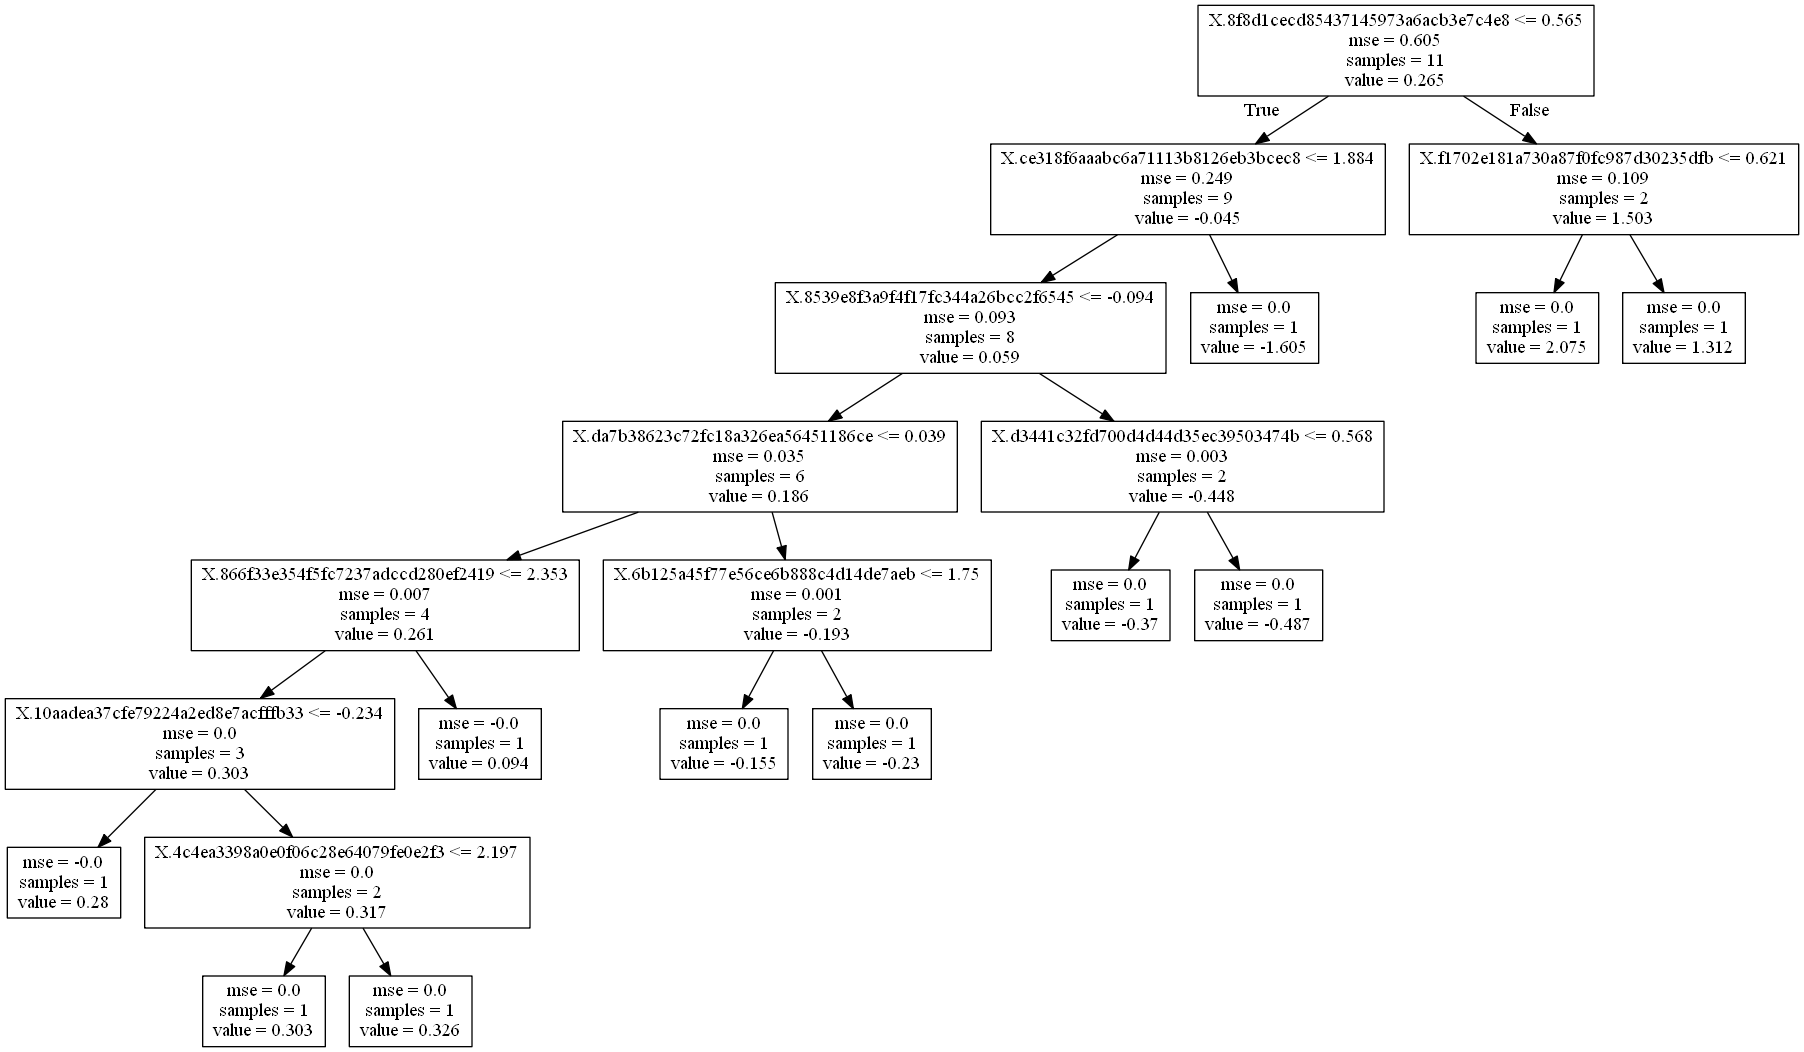

In [31]:
dot_data = StringIO()
estimator = rf2.estimators_[0]
export_graphviz(estimator, out_file=dot_data, feature_names=xtrain_taxa_d.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

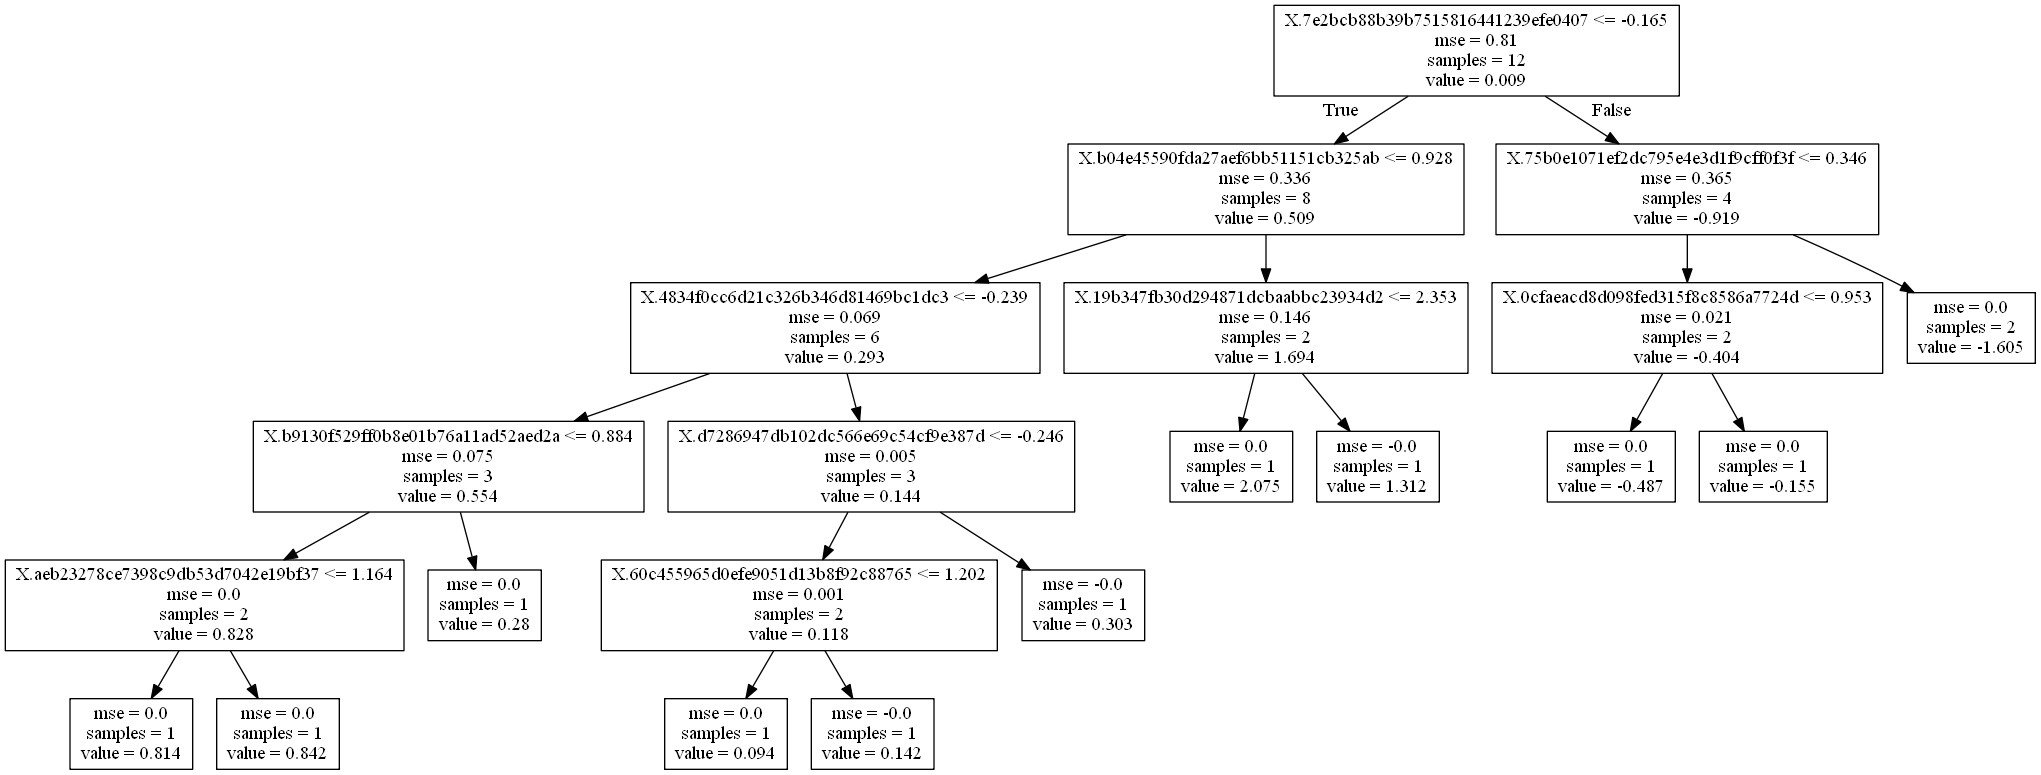

In [32]:
estimator = rf2.estimators_[5]
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data, feature_names=xtrain_taxa_d.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

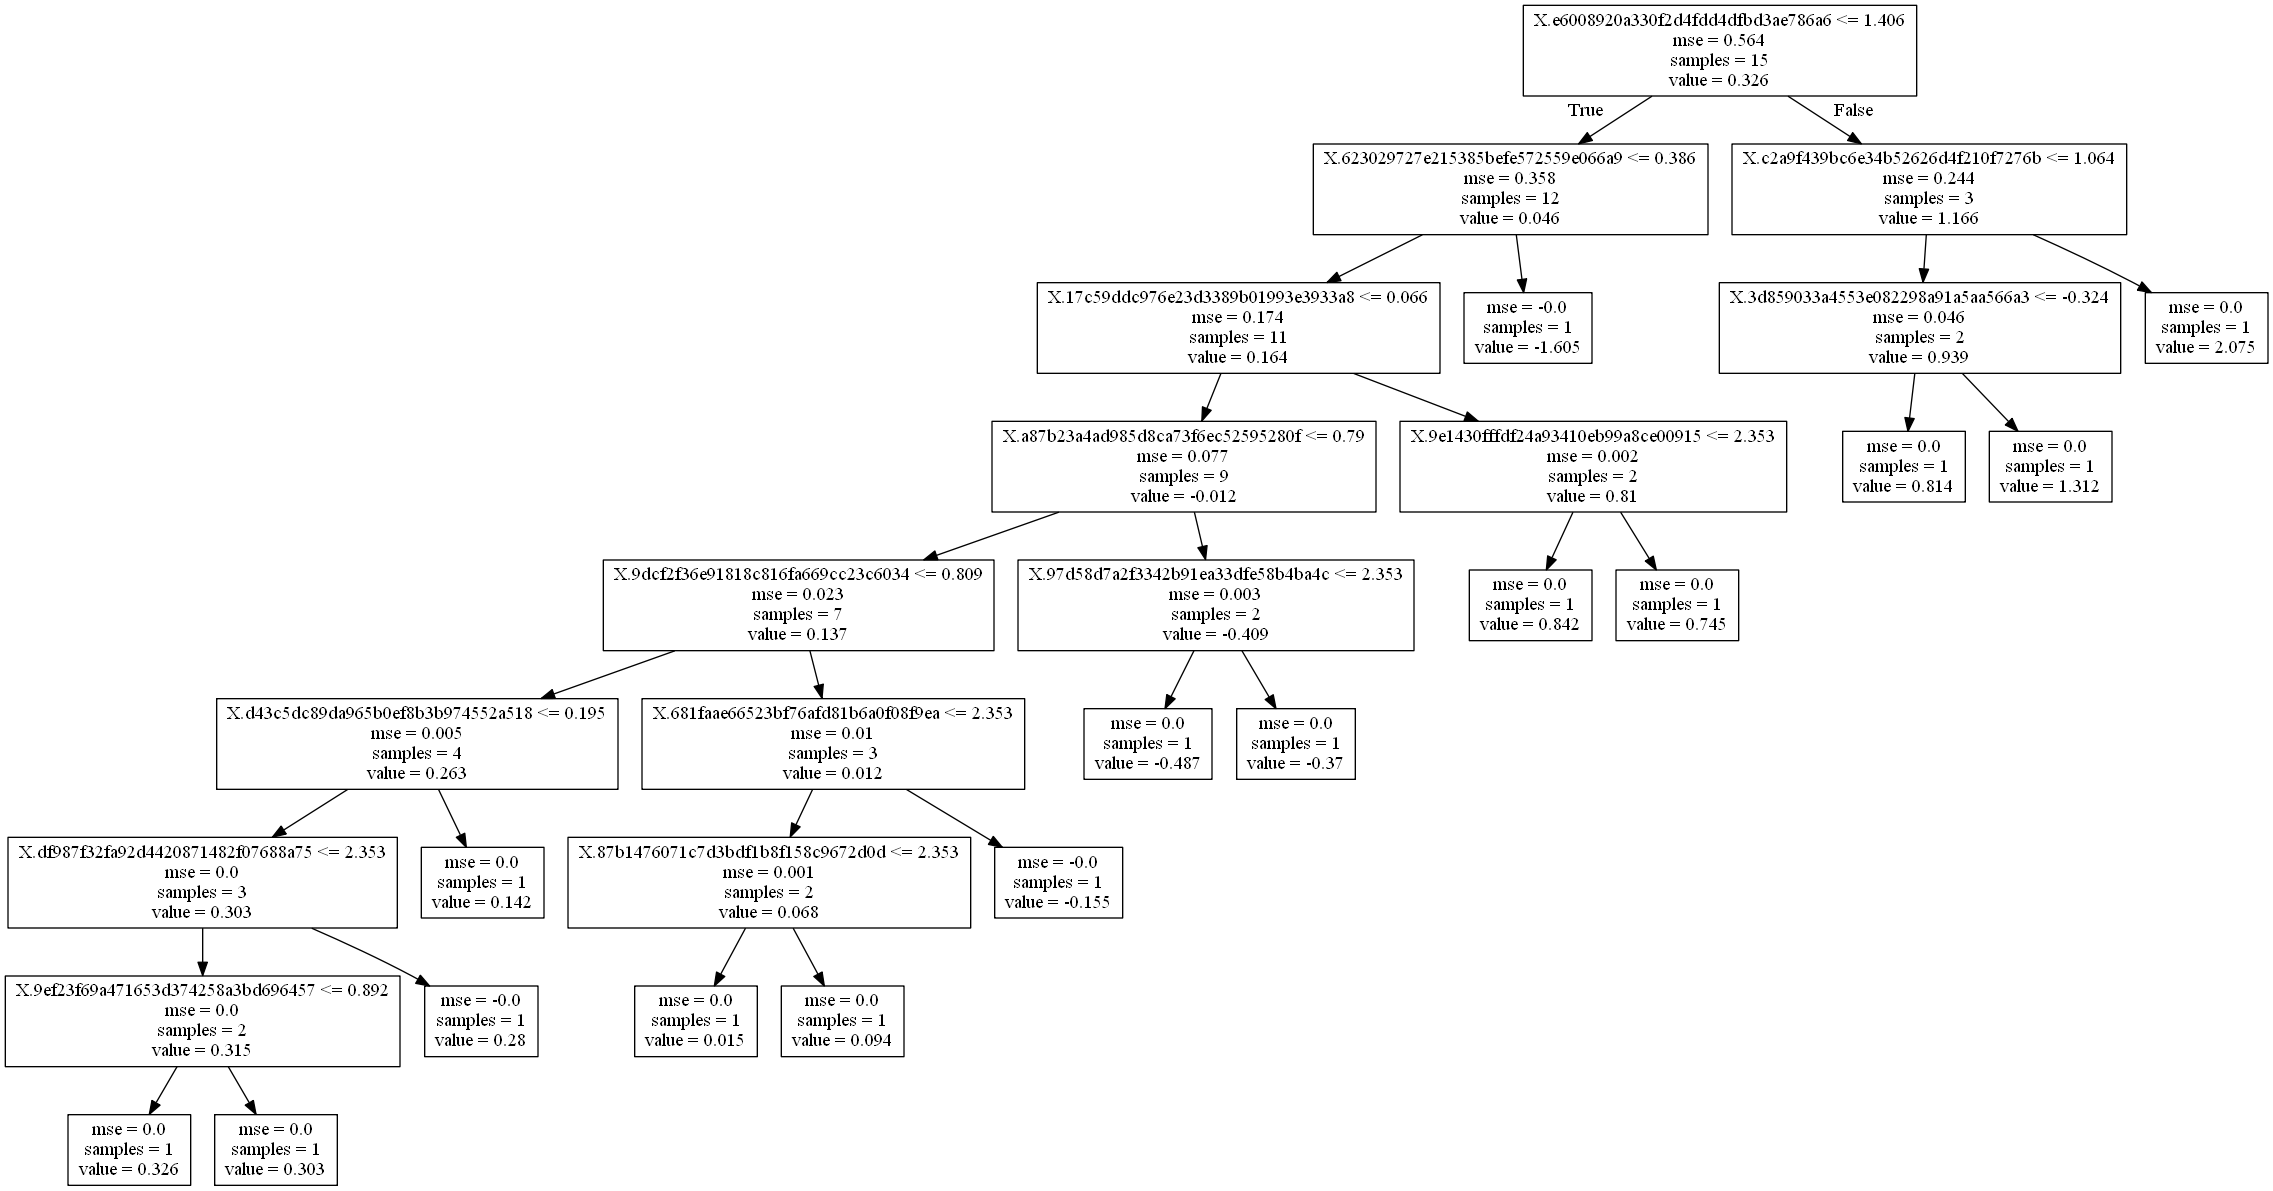

In [33]:
dot_data = StringIO()
estimator = rf2.estimators_[6]
export_graphviz(estimator, out_file=dot_data, feature_names=xtrain_taxa_d.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## combine two data set

In [34]:
clean = pd.concat([meta_clean_2.drop(['Experiment'], axis=1), taxa_clean_2], axis=1)
total, mu_total, sd_total = Utils.normalization(clean)
total = pd.concat([X_taxa.Experiment, total], axis=1)
total

,Experiment,claderich0.1,cladediv0.1,claderich0.15,cladediv0.15,claderich0.2,cladediv0.2,claderich0.25,cladediv0.25,claderich0.3,...,X.b21ace384dce2bee9979419021f280b7,X.b8e03ac481f6e7ad4c5bcae9d44ef0ee,X.bdd19e20552367f7068aae7443c1a878,X.dbeb232ebe90883462f226d519318954,X.e1f1df77139a409085c4139eb7ca3b76,X.f1c0ac2d6e23b055ade81be385d9a58d,X.f6234b004dc286131b767f4ba12d18a6,X.f659d34664f3724bfcafe3a0e6e3eaed,X.fa3f3f5e0b7451c8cae261c34053eb27,X.4092452cccf123b62ba6e23278b18e82
FieldID,,,,,,,,,,,,,,,,,,,,,
1,0,-0.816933,-0.834312,-0.438802,-0.613301,-0.372269,-0.974633,-0.379977,-1.017165,-0.500798,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
2,0,-1.141212,-1.247924,-0.969446,-1.514288,-0.830749,-1.414816,-0.543905,-1.040303,-0.536069,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
3,0,-0.816933,-1.762260,-0.505133,-1.947435,-0.626980,-1.921612,-0.489262,-1.679134,-0.559582,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
4,0,-0.979072,-1.608700,-1.035777,-2.031462,-0.830749,-1.892107,-0.784333,-1.656125,-0.683030,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
5,0,-0.816933,0.644290,-1.035777,0.143113,-0.754335,0.061178,-0.838975,-0.509260,-0.918167,...,-0.196116,-0.196116,-0.196116,-0.196116,4.902903,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
6,0,-0.168376,0.621174,-0.571463,0.508527,-0.525096,0.196726,-0.729690,-0.432975,-0.829991,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
7,0,-1.627630,-0.902004,-1.301099,-0.472995,-1.110930,-0.911188,-1.057546,-1.099497,-1.059250,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
8,0,-0.654794,-0.141548,-0.505133,-0.200683,-0.626980,-0.043240,-0.675047,-0.031088,-0.788842,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116
9,0,0.155903,-0.687395,-0.306141,-0.380072,-0.346798,-0.188449,-0.445548,-0.378903,-0.453770,...,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116,-0.196116


In [35]:
xtrain_d, xval_d, ytrain_d, yval_d = train_test_split(total, yt_disease, test_size = 0.2, random_state = 1)
rf3 = RandomForestRegressor(random_state=2)
rf3.fit(xtrain_d, ytrain_d)

# training set
rf_train_pred3 = pd.Series(rf3.predict(xtrain_d))
rf_train_pred_orig3 = Utils.johnson_inverse(rf_train_pred3, gamma, eta, epsilon, lbda)

# validation set
rf_val_pred3 = pd.Series(rf3.predict(xval_d))
rf_val_pred_orig3 = Utils.johnson_inverse(rf_val_pred3, gamma, eta, epsilon, lbda)

mse_rf_train3 = mean_squared_error(rf_train_pred_orig3, ytrain_d_orig)
mse_rf_val3 = mean_squared_error(rf_val_pred_orig3, yval_d_orig)
np.sqrt(mse_rf_train3), np.sqrt(mse_rf_val3)

C:\Users\CSY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.3742506197730526, 1.7300630944606459)

### tuning 

In [37]:
rfrd_d3 = RandomizedSearchCV(estimator=rf3, param_distributions = param_grid, n_iter=100, cv=5, n_jobs=-1, random_state=2)
rfrd_d3.fit(xtrain_d, ytrain_d)
rfrd_d3.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False, random_state=2,
           verbose=0, warm_start=False)

In [38]:
# training set
rfrd_train_pred3 = pd.Series(rfrd_d3.predict(xtrain_d))
rfrd_train_pred_orig3 = Utils.johnson_inverse(rfrd_train_pred3, gamma, eta, epsilon, lbda)

# validation set
rfrd_val_pred3 = pd.Series(rfrd_d3.predict(xval_d))
rfrd_val_pred_orig3 = Utils.johnson_inverse(rfrd_val_pred3, gamma, eta, epsilon, lbda)

mse_rfrd_train3 = mean_squared_error(rfrd_train_pred_orig3, ytrain_d_orig)
mse_rfrd_val3 = mean_squared_error(rfrd_val_pred_orig3, yval_d_orig)
np.sqrt(mse_rfrd_train3), np.sqrt(mse_rfrd_val3)

(0.5216198399267581, 1.5490361613960566)

## Evaluate all RF Model

In [45]:
rf_eval = pd.DataFrame({"name":["meta", "meta_tuning", "taxa", "taxa_tuning", "combine", "combine_tuning"], 
                       "training MSE": [mse_rf_train1, mse_rfrd_train1, mse_rf_train2, mse_rfrd_train2, mse_rf_train3, mse_rfrd_train3], 
                       "validation MSE": [mse_rf_val1, mse_rfrd_val1, mse_rf_val2, mse_rfrd_val2, mse_rf_val3, mse_rfrd_val3]})
rf_eval

,name,training MSE,validation MSE
0,meta,0.220492,1.782428
1,meta_tuning,1.000488,2.117408
2,taxa,0.203876,2.042171
3,taxa_tuning,0.219537,2.076286
4,combine,0.140064,2.993118
5,combine_tuning,0.272087,2.399513


In [47]:
rf_eval2 = rf_eval
rf_eval2["training MSE"] = np.sqrt(rf_eval2["training MSE"])
rf_eval2["validation MSE"] = np.sqrt(rf_eval2["validation MSE"])
rf_eval2

,name,training MSE,validation MSE
0,meta,0.469566,1.335076
1,meta_tuning,1.000244,1.455132
2,taxa,0.451527,1.429045
3,taxa_tuning,0.468547,1.440932
4,combine,0.374251,1.730063
5,combine_tuning,0.521620,1.549036


In [55]:
def eval_model(ax, df, title):
    barWidth = 0.25
    # set height of bar
    bars1 = df["training MSE"]
    bars2 = df["validation MSE"]

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    ax.bar(r1, bars1, color='#2d7f5e', width=barWidth, edgecolor='white', label='training RMSE')
    ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation RMSE')

    # Add xticks on the middle of the group bars
    ax.set_xlabel('model', fontweight='bold', fontsize=20)
    ax.set_ylabel('RMSE', fontsize=20)
    ax.set_xticks([r + barWidth/2 for r in range(len(bars1))], minor=False)
    ax.set_xticklabels(df.name)
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=2, shadow=False, fontsize=14)
    ax.set_title(title, size=22)

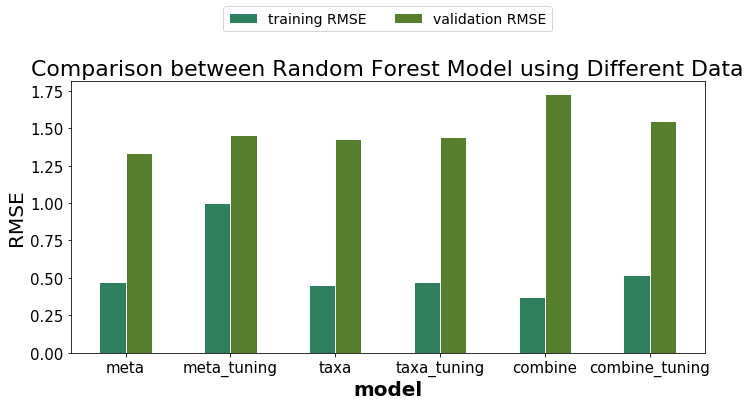

In [56]:
fig = plt.figure(figsize=(25, 5))
ax1 = fig.add_subplot(1,2,1)
eval_model(ax1, rf_eval2, "Comparison between Random Forest Model using Different Data")

pattern: low bias, high variance.  
possible reason: collinearity. 

# XGBoost

In [ ]:
## TODO

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance

In [ ]:
xgb = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.2,    
    seed=2)

xgb.fit(
    xtrain_taxa_d, 
    ytrain_taxa_d, 
    eval_metric="rmse",
    verbose=True, 
    early_stopping_rounds=20)

In [ ]:
model = XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=160,silent=True)
model.fit(xtrain_taxa_d, ytrain_taxa_d)

In [ ]:
plot_importance(model)
plt.show()

In [ ]:
# training set
xgb_train_pred = pd.Series(xgb.predict(xtrain_taxa_d))
xgb_train_pred_orig = Utils.johnson_inverse(rf_train_pred, gamma, eta, epsilon, lbda)
# ytrain_d_orig = Utils.johnson_inverse(ytrain_taxa_d, gamma, eta, epsilon, lbda)

# validation set
xgb_val_pred = pd.Series(xgb.predict(xval_taxa_d))
xgb_val_pred_orig = Utils.johnson_inverse(rf_val_pred, gamma, eta, epsilon, lbda)
# yval_d_orig = Utils.johnson_inverse(yval_taxa_d, gamma, eta, epsilon, lbda)

mse_xgb_train = mean_squared_error(xgb_train_pred_orig, ytrain_d_orig)
mse_xgb_val = mean_squared_error(xgb_val_pred_orig, yval_d_orig)
np.sqrt(mse_rf_train), np.sqrt(mse_rf_val)

In [ ]:
def xgb_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

In [ ]:
plot_importance(xgb)
plt.show()

In [ ]:
xgb_features(xgb, (10,10))